In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

In [2]:
my_dpi = 200                                    # 이미지 선명도(100~300)
font_path = "./NotoSansKR-Regular.ttf"          # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)               # 폰트의 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname=font_path)  # 폰트의 속성을 읽어옴
font_name = font_prop.get_name()                # 읽어온 속성에서 폰트의 이름만 추출     
plt.rcParams['font.family'] = font_name         # 그래프에 한글 폰트 적용
plt.rcParams['font.size'] = 10                  # 기본 폰트크기
plt.rcParams['axes.unicode_minus'] = False      # 그래프에 마이너스 깨짐 방지(한글환경에서 필수)

In [4]:
origin = load_data("countries_aggregated")
origin.head()

[data] https://data.hossam.kr/data/lab09/countries_aggregated.xlsx
[desc] 전 세계 각국(country) 단위로 매일 집계된 COVID-19 감염 상황 (출처: Johns Hopkins University Center for Systems Science and Engineering)

field      description
---------  ----------------------------------------
Date       날짜
Country    국가명
Confirmed  해당 날짜를 기준으로 하는 누적 확진자 수
Recovered  해당 날짜를 기준으로 하는 누적 완치자 수
Deaths     해당 날짜를 기준으로 하는 누적 사망자 수



,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [6]:
origin.tail()

,Date,Country,Confirmed,Recovered,Deaths
161563,2022-04-12,Zimbabwe,247094,0,5460
161564,2022-04-13,Zimbabwe,247160,0,5460
161565,2022-04-14,Zimbabwe,247208,0,5462
161566,2022-04-15,Zimbabwe,247237,0,5462
161567,2022-04-16,Zimbabwe,247237,0,5462


In [8]:
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

데이터셋 크기: (161568, 5)
열 개수: 5
행 개수: 161568


In [10]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB


In [12]:
df = origin.astype({'Country': 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  category      
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(3)
memory usage: 5.2 MB


In [14]:
df.isna().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [16]:
df[['Confirmed', 'Recovered', 'Deaths']].describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,161568.0,736156.934009,3.578884e+06,0.0,1220.0,23692.0,255842.00,80625120.0
Recovered,161568.0,145396.711892,9.748275e+05,0.0,0.0,126.0,17972.25,30974748.0
Deaths,161568.0,13999.436089,5.911358e+04,0.0,17.0,365.0,4509.00,988609.0


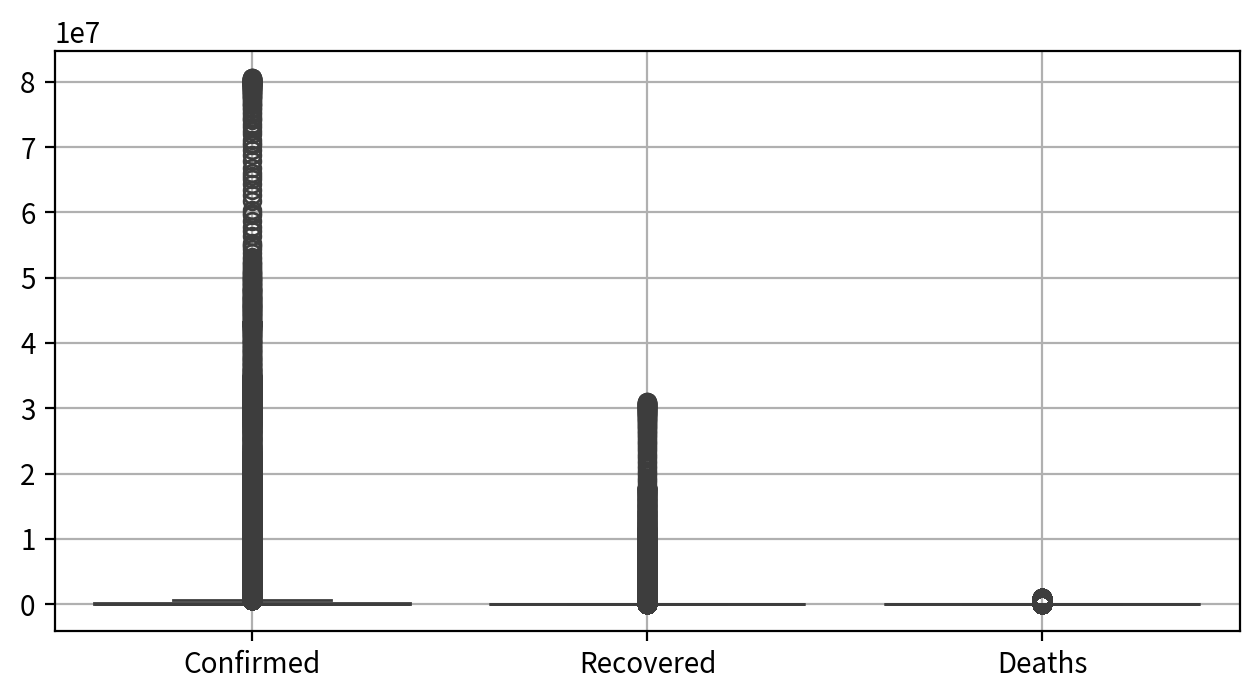

In [18]:
width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.boxplot(data=df, orient="v")


ax.grid(True)


plt.tight_layout()
plt.show()
plt.close()

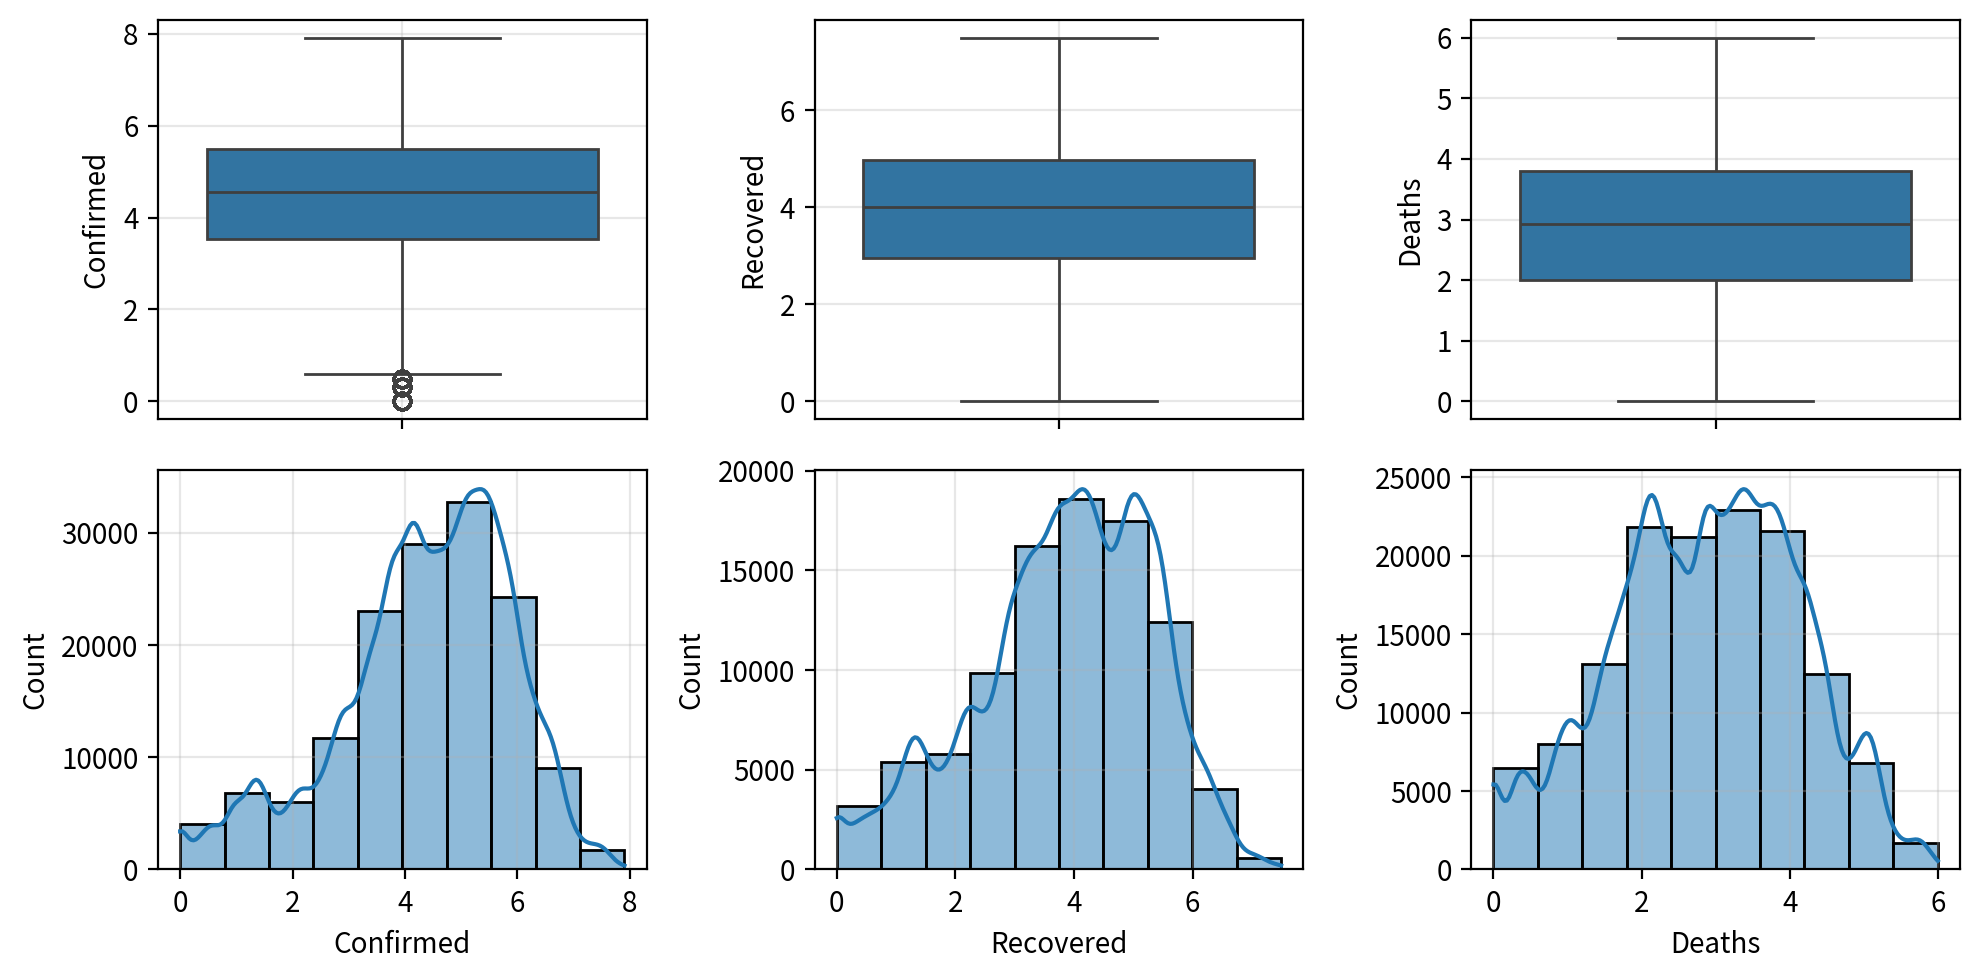

In [20]:
width_px = 2000
height_px = 1000
rows = 2
cols = 3
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

for i,col in enumerate(['Confirmed', 'Recovered', 'Deaths']):
    data = df[df[col]>0][col]
    log_data = np.log10(data)

    sb.boxplot(log_data, orient='v', ax = ax[0][i])
    ax[0][i].grid(True, alpha=0.3)

    sb.histplot(log_data, bins=10, kde=True, ax=ax[1][i])
    ax[1][i].grid(True, alpha=0.3)








plt.tight_layout()
plt.show()
plt.close()

인사이트
시각화 결과를 통해 Confirmed, Recovered에서 명확한 우편향 분포 확인
로그변환 후에도 여전히 치우친 분호: 정규분포와 거리가 멀다.


In [22]:
df.describe(include='category')

,Country
count,161568
unique,198
top,Afghanistan
freq,816


데이터 완성도-결측값 0개: 완벽한 데이터 완성도 달성-198개국 *816일=161,568개 전체 레코드 누락 없음-시계열 연속성 보장으로 추세 분석 가능
데이터 일관성:
모든 수치형 변수가 정수형으로 일관된 타입-날짜 변수는 표준 datetime64 형식을 일관성 유지
데이터 분포 특성-극심한 우편향 분포:소수 국가에 극값 집중 현상-높은 변동성:표준편차가 평균의 4-6배 수준 -국가 간 격차:최대값과 중위수 간 수천~수만 배 차이
분석 시 고려사항
-국가간 격차가 매우 크므로 데이터를 구간별로 나누어서 분석 시도 고려-이상치 처리 필수 
-실제 데이터 기반이므로 이상치를 강제로 다른 값으로 바꾸기 보다는 스케일링을 통한 해결이 바람직
